In [4]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [5]:
### importing datasets 

In [6]:
fifa_rank=pd.read_csv('fifa_ranking-2022-10-06.csv')

In [7]:
fifa_rank

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.00,0.00,0,UEFA,1992-12-31
1,96,Syria,SYR,11.00,0.00,0,AFC,1992-12-31
2,97,Burkina Faso,BFA,11.00,0.00,0,CAF,1992-12-31
3,99,Latvia,LVA,10.00,0.00,0,UEFA,1992-12-31
4,100,Burundi,BDI,10.00,0.00,0,CAF,1992-12-31
...,...,...,...,...,...,...,...,...
63911,74,El Salvador,SLV,1330.51,1333.48,3,CONCACAF,2022-10-06
63912,75,Oman,OMA,1320.29,1323.03,0,AFC,2022-10-06
63913,76,Israel,ISR,1316.55,1316.35,0,UEFA,2022-10-06
63914,78,Georgia,GEO,1307.34,1296.46,-4,UEFA,2022-10-06


In [8]:
results_inter=pd.read_csv('results.csv')

In [9]:
results_inter.shape

(44206, 9)

In [10]:
results_inter

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44201,2022-12-01,Canada,Morocco,NaN,NaN,FIFA World Cup,Doha,Qatar,True
44202,2022-12-02,Serbia,Switzerland,NaN,NaN,FIFA World Cup,Doha,Qatar,True
44203,2022-12-02,Cameroon,Brazil,NaN,NaN,FIFA World Cup,Lusail,Qatar,True
44204,2022-12-02,Ghana,Uruguay,NaN,NaN,FIFA World Cup,Al Wakrah,Qatar,True


In [11]:
results_inter["date"] = pd.to_datetime(results_inter["date"])

## Data Preparation

#### Analysing internationl games from world cup 2018 to before world cup 2022

In [12]:
results_inter=results_inter[results_inter['date']>= "2018-8-1"].reset_index(drop=True)

In [13]:
results_inter

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,2018-08-04,Belize,Barbados,1.0,0.0,Friendly,San Pedro,Belize,False
1,2018-08-04,Palestine,Iraq,0.0,3.0,Friendly,Al-Ram,Palestine,False
2,2018-08-15,Guatemala,Cuba,3.0,0.0,Friendly,Guatemala City,Guatemala,False
3,2018-08-18,Andorra,United Arab Emirates,0.0,0.0,Friendly,Grödig,Austria,True
4,2018-08-18,Grenada,Jamaica,1.0,5.0,Friendly,St. George's,Grenada,False
...,...,...,...,...,...,...,...,...,...
3903,2022-12-01,Canada,Morocco,NaN,NaN,FIFA World Cup,Doha,Qatar,True
3904,2022-12-02,Serbia,Switzerland,NaN,NaN,FIFA World Cup,Doha,Qatar,True
3905,2022-12-02,Cameroon,Brazil,NaN,NaN,FIFA World Cup,Lusail,Qatar,True
3906,2022-12-02,Ghana,Uruguay,NaN,NaN,FIFA World Cup,Al Wakrah,Qatar,True


In [14]:
results_inter=results_inter[results_inter['tournament']!='FIFA World Cup']

In [15]:
results_inter

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,2018-08-04,Belize,Barbados,1.0,0.0,Friendly,San Pedro,Belize,False
1,2018-08-04,Palestine,Iraq,0.0,3.0,Friendly,Al-Ram,Palestine,False
2,2018-08-15,Guatemala,Cuba,3.0,0.0,Friendly,Guatemala City,Guatemala,False
3,2018-08-18,Andorra,United Arab Emirates,0.0,0.0,Friendly,Grödig,Austria,True
4,2018-08-18,Grenada,Jamaica,1.0,5.0,Friendly,St. George's,Grenada,False
...,...,...,...,...,...,...,...,...,...
3855,2022-11-20,Slovenia,Montenegro,1.0,0.0,Friendly,Ljubljana,Slovenia,False
3856,2022-11-20,South Africa,Angola,1.0,1.0,Friendly,Mbombela,South Africa,False
3857,2022-11-20,Saint Lucia,San Marino,1.0,0.0,Friendly,Gros Islet,Saint Lucia,False
3858,2022-11-20,Syria,Venezuela,1.0,2.0,Friendly,Dubai,United Arab Emirates,True


In [16]:
results_inter.home_team.value_counts()

United States    45
Mexico           42
Qatar            40
Bahrain          39
Japan            38
                 ..
Chameria          1
Székely Land      1
Catalonia         1
Cascadia          1
Orkney            1
Name: home_team, Length: 247, dtype: int64

In [17]:
results_inter.tournament.value_counts()

Friendly                                      1075
FIFA World Cup qualification                   863
UEFA Nations League                            468
UEFA Euro qualification                        262
African Cup of Nations qualification           215
CONCACAF Nations League                        173
African Cup of Nations                         104
CONCACAF Nations League qualification           68
African Nations Championship qualification      64
Gold Cup                                        62
Copa América                                    54
AFC Asian Cup                                   51
UEFA Euro                                       51
COSAFA Cup                                      44
AFC Asian Cup qualification                     40
Arab Cup                                        32
AFF Championship                                26
SAFF Cup                                        23
Pacific Games                                   22
CONIFA European Football Cup   

In [18]:
fifa_rank['rank_date'] = pd.to_datetime(fifa_rank['rank_date'])

In [19]:
fifa_rank = fifa_rank[(fifa_rank["rank_date"] >= "2018-8-1")].reset_index(drop=True)

In [20]:
fifa_rank

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,7,Portugal,POR,1599.00,1588.00,3,UEFA,2018-08-16
1,137,Angola,ANG,1096.00,1096.00,0,CAF,2018-08-16
2,138,Myanmar,MYA,1092.00,1092.00,0,AFC,2018-08-16
3,139,Botswana,BOT,1089.00,1088.00,0,CAF,2018-08-16
4,140,Tanzania,TAN,1084.00,1084.00,0,CAF,2018-08-16
...,...,...,...,...,...,...,...,...
7148,74,El Salvador,SLV,1330.51,1333.48,3,CONCACAF,2022-10-06
7149,75,Oman,OMA,1320.29,1323.03,0,AFC,2022-10-06
7150,76,Israel,ISR,1316.55,1316.35,0,UEFA,2022-10-06
7151,78,Georgia,GEO,1307.34,1296.46,-4,UEFA,2022-10-06


#### merging two datasets 

In [21]:
fifa_rank["country_full"] = fifa_rank["country_full"].str.replace("IR Iran", 
                                                                "Iran").str.replace("Korea Republic", "South Korea").str.replace("USA", 
                                                                    "United States").str.replace('Kyrgyz Republic','Kyrgyzstan').str.replace('Brunei Darussalam',
                                            'Brunei').str.replace('St. Vincent / Grenadines','Saint Vincent and the Grenadines').str.replace('US Virgin Islands',
                                            'United States Virgin Islands').str.replace('St. Kitts and Nevis',
                                            'Saint Kitts and Nevis').str.replace("Côte d'Ivoire",'Ivory Coast').str.replace('Cape Verde Islands',
                                            'Cape Verde').str.replace('St. Lucia','Saint Lucia').str.replace('Korea DPR',
                                            'North Korea').str.replace('New Caledonia','Cascadia').str.replace('Congo DR','DR Congo').str.replace('Chinese Taipei','Taiwan').str.replace('Cabo Verde','Cape Verde')

In [22]:
results_inter

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,2018-08-04,Belize,Barbados,1.0,0.0,Friendly,San Pedro,Belize,False
1,2018-08-04,Palestine,Iraq,0.0,3.0,Friendly,Al-Ram,Palestine,False
2,2018-08-15,Guatemala,Cuba,3.0,0.0,Friendly,Guatemala City,Guatemala,False
3,2018-08-18,Andorra,United Arab Emirates,0.0,0.0,Friendly,Grödig,Austria,True
4,2018-08-18,Grenada,Jamaica,1.0,5.0,Friendly,St. George's,Grenada,False
...,...,...,...,...,...,...,...,...,...
3855,2022-11-20,Slovenia,Montenegro,1.0,0.0,Friendly,Ljubljana,Slovenia,False
3856,2022-11-20,South Africa,Angola,1.0,1.0,Friendly,Mbombela,South Africa,False
3857,2022-11-20,Saint Lucia,San Marino,1.0,0.0,Friendly,Gros Islet,Saint Lucia,False
3858,2022-11-20,Syria,Venezuela,1.0,2.0,Friendly,Dubai,United Arab Emirates,True


In [23]:
fifa_rank=fifa_rank[(fifa_rank['country_full'].isin((results_inter['home_team'])))&(fifa_rank['country_full'].isin((results_inter['away_team'])))]

In [24]:
results_inter=results_inter[(results_inter['home_team'].isin(fifa_rank['country_full']))&(results_inter['away_team'].isin(fifa_rank['country_full']))]

In [25]:
fifa_rank=fifa_rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]]
fifa_rank

,country_full,total_points,previous_points,rank,rank_change,rank_date
0,Portugal,1599.00,1588.00,7,3,2018-08-16
1,Angola,1096.00,1096.00,137,0,2018-08-16
2,Myanmar,1092.00,1092.00,138,0,2018-08-16
3,Botswana,1089.00,1088.00,139,0,2018-08-16
4,Tanzania,1084.00,1084.00,140,0,2018-08-16
...,...,...,...,...,...,...
7148,El Salvador,1330.51,1333.48,74,3,2022-10-06
7149,Oman,1320.29,1323.03,75,0,2022-10-06
7150,Israel,1316.55,1316.35,76,0,2022-10-06
7151,Georgia,1307.34,1296.46,78,-4,2022-10-06


In [26]:
fifa_rank = fifa_rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()

In [27]:
fifa_rank

,rank_date,country_full,total_points,previous_points,rank,rank_change
0,2018-08-16,Afghanistan,1068.00,1068.00,145.0,0.0
1,2018-08-17,Afghanistan,1068.00,1068.00,145.0,0.0
2,2018-08-18,Afghanistan,1068.00,1068.00,145.0,0.0
3,2018-08-19,Afghanistan,1068.00,1068.00,145.0,0.0
4,2018-08-20,Afghanistan,1068.00,1068.00,145.0,0.0
...,...,...,...,...,...,...
311786,2022-10-02,Zimbabwe,1138.56,1138.56,123.0,0.0
311787,2022-10-03,Zimbabwe,1138.56,1138.56,123.0,0.0
311788,2022-10-04,Zimbabwe,1138.56,1138.56,123.0,0.0
311789,2022-10-05,Zimbabwe,1138.56,1138.56,123.0,0.0


In [28]:
df_wc_ranked = results_inter.merge(fifa_rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "home_team"], right_on=["rank_date", "country_full"]).drop(["rank_date", "country_full"], axis=1)

df_wc_ranked = df_wc_ranked.merge(fifa_rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "away_team"], right_on=["rank_date", "country_full"], suffixes=("_home", "_away")).drop(["rank_date", "country_full"], axis=1)

In [29]:
df=df_wc_ranked

In [30]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
0,2018-08-18,Andorra,United Arab Emirates,0.0,0.0,Friendly,Grödig,Austria,True,1120.00,1120.00,130.0,0.0,1312.00,1312.00,77.0,0.0
1,2018-08-18,Grenada,Jamaica,1.0,5.0,Friendly,St. George's,Grenada,False,980.00,980.00,168.0,0.0,1400.00,1400.00,54.0,0.0
2,2018-08-18,Guatemala,Cuba,1.0,0.0,Friendly,Quetzaltenango,Guatemala,False,1064.00,1064.00,146.0,0.0,940.00,940.00,181.0,0.0
3,2018-08-20,Barbados,Jamaica,2.0,2.0,Friendly,Bridgetown,Barbados,False,1005.00,1008.00,160.0,0.0,1400.00,1400.00,54.0,0.0
4,2018-08-26,Barbados,Cuba,0.0,0.0,Friendly,Bridgetown,Barbados,False,1005.00,1008.00,160.0,0.0,940.00,940.00,181.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False,1488.57,1488.57,36.0,0.0,1549.53,1549.53,25.0,0.0
3533,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False,1563.44,1563.44,20.0,0.0,1372.48,1372.48,65.0,0.0
3534,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False,1183.90,1183.90,106.0,0.0,1180.52,1180.52,108.0,1.0
3535,2022-09-27,Greece,Northern Ireland,3.0,1.0,UEFA Nations League,Athens,Greece,False,1441.45,1441.45,49.0,1.0,1399.10,1399.10,58.0,0.0


In [31]:
def result_finder(home, away):
    if home > away:
        return pd.Series([0, 3, 0])
    if home < away:
        return pd.Series([1, 0, 3])
    else:
        return pd.Series([2, 1, 1])

results = df.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1)

In [32]:
results

,0,1,2
0,2,1,1
1,1,0,3
2,0,3,0
3,2,1,1
4,2,1,1
...,...,...,...
3532,1,0,3
3533,2,1,1
3534,0,3,0
3535,0,3,0


In [33]:
df[["result", "home_team_points", "away_team_points"]] = results

In [34]:
df["rank_dif"] = df["rank_home"] - df["rank_away"]

In [35]:
df["sg"] = df["home_score"] - df["away_score"]
df["points_home_by_rank"] = df["home_team_points"]/df["rank_away"]
df["points_away_by_rank"] = df["away_team_points"]/df["rank_home"]

In [36]:
df.columns 

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'sg', 'points_home_by_rank', 'points_away_by_rank'],
      dtype='object')

In [37]:
home_team = df[["date", "home_team", "home_score", "away_score", "rank_home", "rank_away","rank_change_home", "total_points_home", "result", "rank_dif", "points_home_by_rank", "home_team_points"]]

away_team = df[["date", "away_team", "away_score", "home_score", "rank_away", "rank_home","rank_change_away", "total_points_away", "result", "rank_dif", "points_away_by_rank", "away_team_points"]]

In [38]:
home_team.columns = [h.replace("home_", "").replace("_home", "").replace("away_", "suf_").replace("_away", "_suf") for h in home_team.columns]

away_team.columns = [a.replace("away_", "").replace("_away", "").replace("home_", "suf_").replace("_home", "_suf") for a in away_team.columns]

In [39]:
team_stats = home_team.append(away_team)

- Mean goals of the team in World Cup Cycle.
- Mean goals of the team in last 5 games.
- Mean goals suffered of the team in World Cup Cycle.
- Mean goals suffered of the team in last 5 games.
- Mean FIFA Rank that team faced in World Cup Cycle.
- Mean FIFA Rank that team faced in last 5 games.
- FIFA Points won at the cycle.
- FIFA Points won in last 5 games.
- Mean game points at the Cycle.
- Mean game points at last 5 games.
- Mean game points by rank faced at the Cycle.
- Mean game points by rank faced at last 5 games.

calculating the stats for each team in given date 

In [40]:
team_stats

,date,team,score,suf_score,rank,rank_suf,rank_change,total_points,result,rank_dif,points_by_rank,team_points
0,2018-08-18,Andorra,0.0,0.0,130.0,77.0,0.0,1120.00,2,53.0,0.012987,1
1,2018-08-18,Grenada,1.0,5.0,168.0,54.0,0.0,980.00,1,114.0,0.000000,0
2,2018-08-18,Guatemala,1.0,0.0,146.0,181.0,0.0,1064.00,0,-35.0,0.016575,3
3,2018-08-20,Barbados,2.0,2.0,160.0,54.0,0.0,1005.00,2,106.0,0.018519,1
4,2018-08-26,Barbados,0.0,0.0,160.0,181.0,0.0,1005.00,2,-21.0,0.005525,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3532,2022-09-27,Serbia,2.0,0.0,25.0,36.0,0.0,1549.53,1,11.0,0.083333,3
3533,2022-09-27,Slovenia,1.0,1.0,65.0,20.0,0.0,1372.48,2,-45.0,0.050000,1
3534,2022-09-27,Cyprus,1.0,5.0,108.0,106.0,1.0,1180.52,0,-2.0,0.000000,0
3535,2022-09-27,Northern Ireland,1.0,3.0,58.0,49.0,0.0,1399.10,0,-9.0,0.000000,0


In [41]:
stats_val = []

for index, row in team_stats.iterrows():
    team = row["team"]
    date = row["date"]
    past_games = team_stats.loc[(team_stats["team"] == team) & (team_stats["date"] < date)].sort_values(by=['date'], ascending=False)
    last5 = past_games.head(5)
    
    goals = past_games["score"].mean()
    goals_l5 = last5["score"].mean()
    
    goals_suf = past_games["suf_score"].mean()
    goals_suf_l5 = last5["suf_score"].mean()
    
    rank = past_games["rank_suf"].mean()
    rank_l5 = last5["rank_suf"].mean()
    
    if len(last5) > 0:
        points = past_games["total_points"].values[0] - past_games["total_points"].values[-1]#qtd de pontos ganhos
        points_l5 = last5["total_points"].values[0] - last5["total_points"].values[-1] 
    else:
        points = 0
        points_l5 = 0
        
    gp = past_games["team_points"].mean()
    gp_l5 = last5["team_points"].mean()
    
    gp_rank = past_games["points_by_rank"].mean()
    gp_rank_l5 = last5["points_by_rank"].mean()
    
    stats_val.append([goals, goals_l5, goals_suf, goals_suf_l5, rank, rank_l5, points, points_l5, gp, gp_l5, gp_rank, gp_rank_l5])


In [42]:
stats_cols = ["goals_mean", "goals_mean_l5", "goals_suf_mean", "goals_suf_mean_l5", "rank_mean", "rank_mean_l5", "points_mean", "points_mean_l5", "game_points_mean", "game_points_mean_l5", "game_points_rank_mean", "game_points_rank_mean_l5"]

stats_df = pd.DataFrame(stats_val, columns=stats_cols)

In [43]:
stats_df

,goals_mean,goals_mean_l5,goals_suf_mean,goals_suf_mean_l5,rank_mean,rank_mean_l5,points_mean,points_mean_l5,game_points_mean,game_points_mean_l5,game_points_rank_mean,game_points_rank_mean_l5
0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,2.000000,2.0,2.000000,2.0,54.000000,54.0,0.00,0.00,1.000000,1.0,0.018519,0.018519
...,...,...,...,...,...,...,...,...,...,...,...,...
7069,1.800000,2.2,1.111111,1.0,54.533333,42.0,90.53,2.00,1.866667,2.0,0.053327,0.073887
7070,1.380952,1.0,1.000000,1.8,76.357143,29.2,-19.52,-5.75,1.404762,1.0,0.026035,0.029545
7071,0.767442,0.6,1.767442,1.4,70.418605,63.8,-99.48,-5.57,0.767442,1.0,0.009687,0.019652
7072,1.023256,1.2,1.279070,1.4,57.906977,95.6,-92.90,-24.45,1.139535,1.0,0.022315,0.009470


In [44]:
full_df = pd.concat([team_stats.reset_index(drop=True), stats_df], axis=1, ignore_index=False)

In [45]:
full_df

,date,team,score,suf_score,rank,rank_suf,rank_change,total_points,result,rank_dif,...,goals_suf_mean,goals_suf_mean_l5,rank_mean,rank_mean_l5,points_mean,points_mean_l5,game_points_mean,game_points_mean_l5,game_points_rank_mean,game_points_rank_mean_l5
0,2018-08-18,Andorra,0.0,0.0,130.0,77.0,0.0,1120.00,2,53.0,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,2018-08-18,Grenada,1.0,5.0,168.0,54.0,0.0,980.00,1,114.0,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,2018-08-18,Guatemala,1.0,0.0,146.0,181.0,0.0,1064.00,0,-35.0,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,2018-08-20,Barbados,2.0,2.0,160.0,54.0,0.0,1005.00,2,106.0,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,2018-08-26,Barbados,0.0,0.0,160.0,181.0,0.0,1005.00,2,-21.0,...,2.000000,2.0,54.000000,54.0,0.00,0.00,1.000000,1.0,0.018519,0.018519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7069,2022-09-27,Serbia,2.0,0.0,25.0,36.0,0.0,1549.53,1,11.0,...,1.111111,1.0,54.533333,42.0,90.53,2.00,1.866667,2.0,0.053327,0.073887
7070,2022-09-27,Slovenia,1.0,1.0,65.0,20.0,0.0,1372.48,2,-45.0,...,1.000000,1.8,76.357143,29.2,-19.52,-5.75,1.404762,1.0,0.026035,0.029545
7071,2022-09-27,Cyprus,1.0,5.0,108.0,106.0,1.0,1180.52,0,-2.0,...,1.767442,1.4,70.418605,63.8,-99.48,-5.57,0.767442,1.0,0.009687,0.019652
7072,2022-09-27,Northern Ireland,1.0,3.0,58.0,49.0,0.0,1399.10,0,-9.0,...,1.279070,1.4,57.906977,95.6,-92.90,-24.45,1.139535,1.0,0.022315,0.009470


In [46]:
home_team_stats = full_df.iloc[:int(full_df.shape[0]/2),:]
away_team_stats = full_df.iloc[int(full_df.shape[0]/2):,:]

In [47]:
home_team_stats

,date,team,score,suf_score,rank,rank_suf,rank_change,total_points,result,rank_dif,...,goals_suf_mean,goals_suf_mean_l5,rank_mean,rank_mean_l5,points_mean,points_mean_l5,game_points_mean,game_points_mean_l5,game_points_rank_mean,game_points_rank_mean_l5
0,2018-08-18,Andorra,0.0,0.0,130.0,77.0,0.0,1120.00,2,53.0,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,2018-08-18,Grenada,1.0,5.0,168.0,54.0,0.0,980.00,1,114.0,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,2018-08-18,Guatemala,1.0,0.0,146.0,181.0,0.0,1064.00,0,-35.0,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,2018-08-20,Barbados,2.0,2.0,160.0,54.0,0.0,1005.00,2,106.0,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,2018-08-26,Barbados,0.0,0.0,160.0,181.0,0.0,1005.00,2,-21.0,...,2.000000,2.0,54.000000,54.0,0.00,0.00,1.000000,1.0,0.018519,0.018519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,2022-09-27,Norway,0.0,2.0,36.0,25.0,0.0,1488.57,1,11.0,...,0.880952,1.0,63.547619,38.6,82.57,25.07,1.833333,2.0,0.041984,0.090235
3533,2022-09-27,Sweden,1.0,1.0,20.0,65.0,0.0,1563.44,2,-45.0,...,1.137255,2.0,51.254902,39.4,-1.56,-21.33,1.607843,0.6,0.048520,0.009231
3534,2022-09-27,Kosovo,5.0,1.0,106.0,108.0,0.0,1183.90,0,-2.0,...,1.304348,1.4,77.456522,65.4,103.90,10.00,1.326087,1.2,0.018478,0.016825
3535,2022-09-27,Greece,3.0,1.0,49.0,58.0,1.0,1441.45,0,-9.0,...,0.909091,0.2,73.931818,96.2,5.45,20.02,1.590909,2.4,0.050090,0.028040


In [48]:
home_team_stats = home_team_stats[home_team_stats.columns[-12:]]
away_team_stats = away_team_stats[away_team_stats.columns[-12:]]

In [49]:
home_team_stats.columns = ['home_'+str(col) for col in home_team_stats.columns]
away_team_stats.columns = ['away_'+str(col) for col in away_team_stats.columns]

In [50]:
match_stats = pd.concat([home_team_stats, away_team_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [51]:
match_stats

,home_goals_mean,home_goals_mean_l5,home_goals_suf_mean,home_goals_suf_mean_l5,home_rank_mean,home_rank_mean_l5,home_points_mean,home_points_mean_l5,home_game_points_mean,home_game_points_mean_l5,...,away_goals_suf_mean,away_goals_suf_mean_l5,away_rank_mean,away_rank_mean_l5,away_points_mean,away_points_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5
0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,...,1.000000,1.0,168.000000,168.0,0.00,0.00,3.000000,3.0,0.017857,0.017857
4,2.000000,2.0,2.000000,2.0,54.000000,54.0,0.00,0.00,1.000000,1.0,...,1.000000,1.0,146.000000,146.0,0.00,0.00,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,1.761905,1.4,0.880952,1.0,63.547619,38.6,82.57,25.07,1.833333,2.0,...,1.111111,1.0,54.533333,42.0,90.53,2.00,1.866667,2.0,0.053327,0.073887
3533,1.411765,1.2,1.137255,2.0,51.254902,39.4,-1.56,-21.33,1.607843,0.6,...,1.000000,1.8,76.357143,29.2,-19.52,-5.75,1.404762,1.0,0.026035,0.029545
3534,1.434783,1.2,1.304348,1.4,77.456522,65.4,103.90,10.00,1.326087,1.2,...,1.767442,1.4,70.418605,63.8,-99.48,-5.57,0.767442,1.0,0.009687,0.019652
3535,1.090909,1.4,0.909091,0.2,73.931818,96.2,5.45,20.02,1.590909,2.4,...,1.279070,1.4,57.906977,95.6,-92.90,-24.45,1.139535,1.0,0.022315,0.009470


In [52]:
full_df = pd.concat([df, match_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [53]:
full_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,...,away_goals_suf_mean,away_goals_suf_mean_l5,away_rank_mean,away_rank_mean_l5,away_points_mean,away_points_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5
0,2018-08-18,Andorra,United Arab Emirates,0.0,0.0,Friendly,Grödig,Austria,True,1120.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,2018-08-18,Grenada,Jamaica,1.0,5.0,Friendly,St. George's,Grenada,False,980.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,2018-08-18,Guatemala,Cuba,1.0,0.0,Friendly,Quetzaltenango,Guatemala,False,1064.00,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,2018-08-20,Barbados,Jamaica,2.0,2.0,Friendly,Bridgetown,Barbados,False,1005.00,...,1.000000,1.0,168.000000,168.0,0.00,0.00,3.000000,3.0,0.017857,0.017857
4,2018-08-26,Barbados,Cuba,0.0,0.0,Friendly,Bridgetown,Barbados,False,1005.00,...,1.000000,1.0,146.000000,146.0,0.00,0.00,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False,1488.57,...,1.111111,1.0,54.533333,42.0,90.53,2.00,1.866667,2.0,0.053327,0.073887
3533,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False,1563.44,...,1.000000,1.8,76.357143,29.2,-19.52,-5.75,1.404762,1.0,0.026035,0.029545
3534,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False,1183.90,...,1.767442,1.4,70.418605,63.8,-99.48,-5.57,0.767442,1.0,0.009687,0.019652
3535,2022-09-27,Greece,Northern Ireland,3.0,1.0,UEFA Nations League,Athens,Greece,False,1441.45,...,1.279070,1.4,57.906977,95.6,-92.90,-24.45,1.139535,1.0,0.022315,0.009470


In [54]:
full_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'sg', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_l5', 'home_goals_suf_mean',
       'home_goals_suf_mean_l5', 'home_rank_mean', 'home_rank_mean_l5',
       'home_points_mean', 'home_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_goals_mean',
       'away_goals_mean_l5', 'away_goals_suf_mean', 'away_goals_suf_mean_l5',
       'away_rank_mean', 'away_rank_mean_l5', 'away_points_mean',
       'away_points_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_

In [55]:
def find_friendly(x):
    if x == "Friendly":
        return 1
    else: return 0

full_df["is_friendly"] = full_df["tournament"].apply(lambda x: find_friendly(x)) 

In [56]:
full_df["is_friendly"].value_counts()

0    2583
1     954
Name: is_friendly, dtype: int64

In [57]:
full_df = pd.get_dummies(full_df, columns=["is_friendly"])

In [58]:
full_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'sg', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_l5', 'home_goals_suf_mean',
       'home_goals_suf_mean_l5', 'home_rank_mean', 'home_rank_mean_l5',
       'home_points_mean', 'home_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_goals_mean',
       'away_goals_mean_l5', 'away_goals_suf_mean', 'away_goals_suf_mean_l5',
       'away_rank_mean', 'away_rank_mean_l5', 'away_points_mean',
       'away_points_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_

In [59]:
base_df = full_df[["date", "home_team", "away_team", "rank_home", "rank_away","home_score", "away_score","result", "rank_dif", "rank_change_home", "rank_change_away", 'home_goals_mean',
       'home_goals_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5',
       'home_rank_mean', 'home_rank_mean_l5', 'home_points_mean',
       'home_points_mean_l5', 'away_goals_mean', 'away_goals_mean_l5',
       'away_goals_suf_mean', 'away_goals_suf_mean_l5', 'away_rank_mean',
       'away_rank_mean_l5', 'away_points_mean', 'away_points_mean_l5','home_game_points_mean', 'home_game_points_mean_l5',
       'home_game_points_rank_mean', 'home_game_points_rank_mean_l5','away_game_points_mean',
       'away_game_points_mean_l5', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_l5',
       'is_friendly_0', 'is_friendly_1']]

base_df.tail()

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1
3532,2022-09-27,Norway,Serbia,36.0,25.0,0.0,2.0,1,11.0,0.0,...,1.833333,2.0,0.041984,0.090235,1.866667,2.0,0.053327,0.073887,1,0
3533,2022-09-27,Sweden,Slovenia,20.0,65.0,1.0,1.0,2,-45.0,0.0,...,1.607843,0.6,0.048520,0.009231,1.404762,1.0,0.026035,0.029545,1,0
3534,2022-09-27,Kosovo,Cyprus,106.0,108.0,5.0,1.0,0,-2.0,0.0,...,1.326087,1.2,0.018478,0.016825,0.767442,1.0,0.009687,0.019652,1,0
3535,2022-09-27,Greece,Northern Ireland,49.0,58.0,3.0,1.0,0,-9.0,1.0,...,1.590909,2.4,0.050090,0.028040,1.139535,1.0,0.022315,0.009470,1,0
3536,2022-09-30,Fiji,Solomon Islands,163.0,137.0,1.0,0.0,0,26.0,0.0,...,1.285714,0.8,0.007995,0.005118,1.750000,1.6,0.010820,0.009835,1,0


In [60]:
base_df.isna().sum()

date                               0
home_team                          0
away_team                          0
rank_home                          0
rank_away                          0
home_score                         0
away_score                         0
result                             0
rank_dif                           0
rank_change_home                   0
rank_change_away                   0
home_goals_mean                  106
home_goals_mean_l5               106
home_goals_suf_mean              106
home_goals_suf_mean_l5           106
home_rank_mean                   106
home_rank_mean_l5                106
home_points_mean                   0
home_points_mean_l5                0
away_goals_mean                  102
away_goals_mean_l5               102
away_goals_suf_mean              102
away_goals_suf_mean_l5           102
away_rank_mean                   102
away_rank_mean_l5                102
away_points_mean                   0
away_points_mean_l5                0
h

In [61]:
df = base_df.dropna()

##### Creating now the target variable 

In [62]:
def no_draw(x):
    if x == 2:
        return 1
    else:
        return x
    
df["target"] = df["result"].apply(lambda x: no_draw(x))

In [63]:
df.head()

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1,target
4,2018-08-26,Barbados,Cuba,160.0,181.0,0.0,0.0,2,-21.0,0.0,...,1.0,0.018519,0.018519,0.0,0.0,0.000000,0.000000,0,1,1
6,2018-08-29,Barbados,Cuba,160.0,181.0,0.0,2.0,1,-21.0,0.0,...,1.0,0.012022,0.012022,0.5,0.5,0.003125,0.003125,0,1,1
33,2018-09-06,Mongolia,Guam,186.0,190.0,1.0,1.0,2,-4.0,0.0,...,3.0,0.016216,0.016216,0.0,0.0,0.000000,0.000000,1,0,1
34,2018-09-06,Nepal,Bhutan,161.0,183.0,4.0,0.0,0,-22.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1,0,0
35,2018-09-06,Bangladesh,Pakistan,194.0,201.0,1.0,0.0,0,-7.0,0.0,...,1.5,0.008197,0.008197,3.0,3.0,0.018634,0.018634,1,0,0


In [64]:
df.columns

Index(['date', 'home_team', 'away_team', 'rank_home', 'rank_away',
       'home_score', 'away_score', 'result', 'rank_dif', 'rank_change_home',
       'rank_change_away', 'home_goals_mean', 'home_goals_mean_l5',
       'home_goals_suf_mean', 'home_goals_suf_mean_l5', 'home_rank_mean',
       'home_rank_mean_l5', 'home_points_mean', 'home_points_mean_l5',
       'away_goals_mean', 'away_goals_mean_l5', 'away_goals_suf_mean',
       'away_goals_suf_mean_l5', 'away_rank_mean', 'away_rank_mean_l5',
       'away_points_mean', 'away_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_l5', 'is_friendly_0', 'is_friendly_1',
       'target'],
      dtype='object')

### selecting features 

In [65]:
import seaborn as sns 
import matplotlib.pyplot as plt 

<AxesSubplot:>

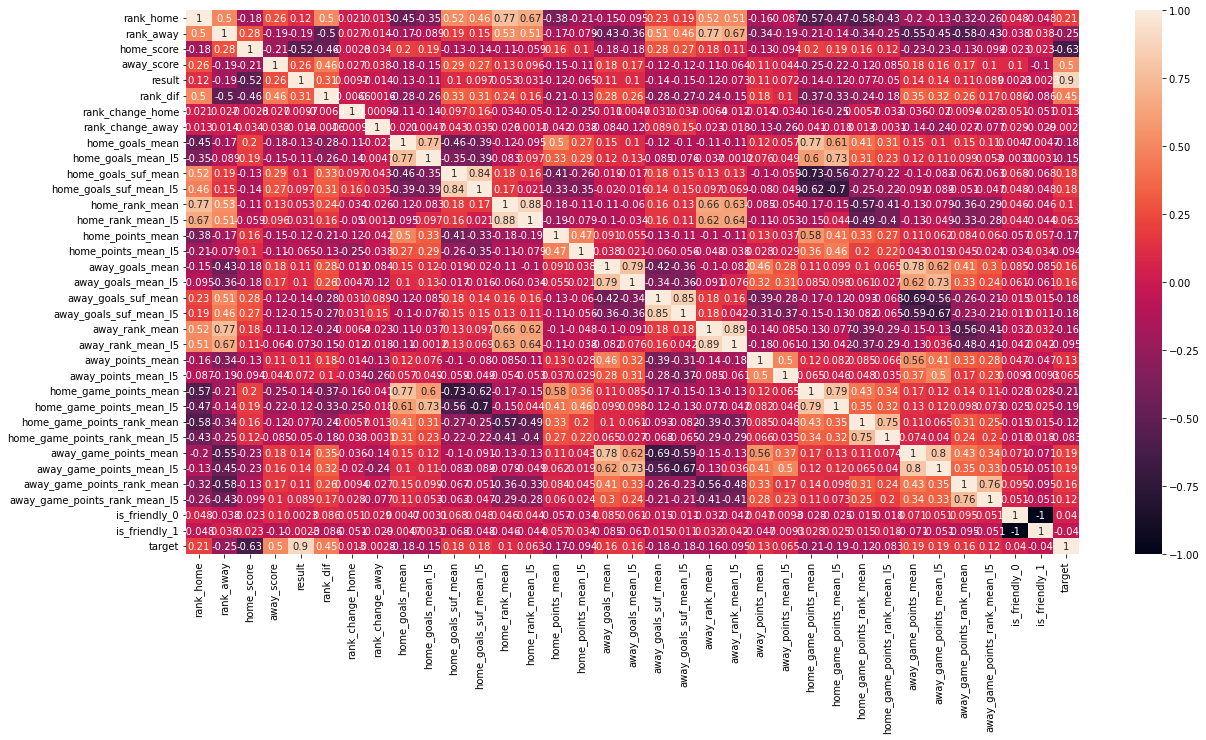

In [66]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(df.corr(),ax=ax,annot=True)

In [67]:
data1 = df[list(df.columns[8:20].values) + ["target"]]
data2 = df[df.columns[20:]]

In [68]:
scaled = (data1[:-1] - data1[:-1].mean()) / data1[:-1].std()
scaled["target"] = data1["target"]
violin1 = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

scaled = (data2[:-1] - data2[:-1].mean()) / data2[:-1].std()
scaled["target"] = data2["target"]
violin2 = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

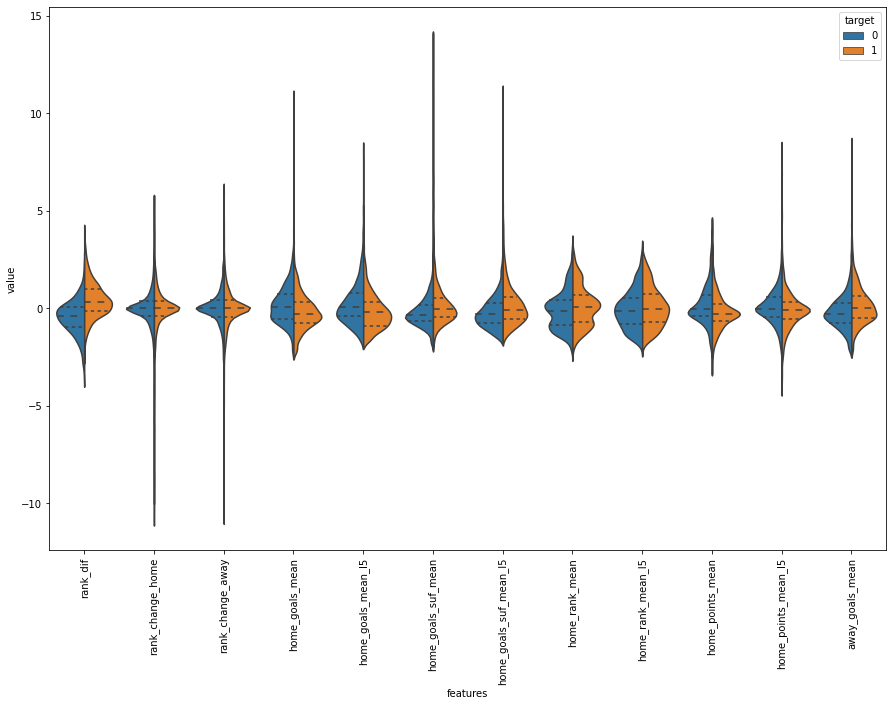

In [69]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin1,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

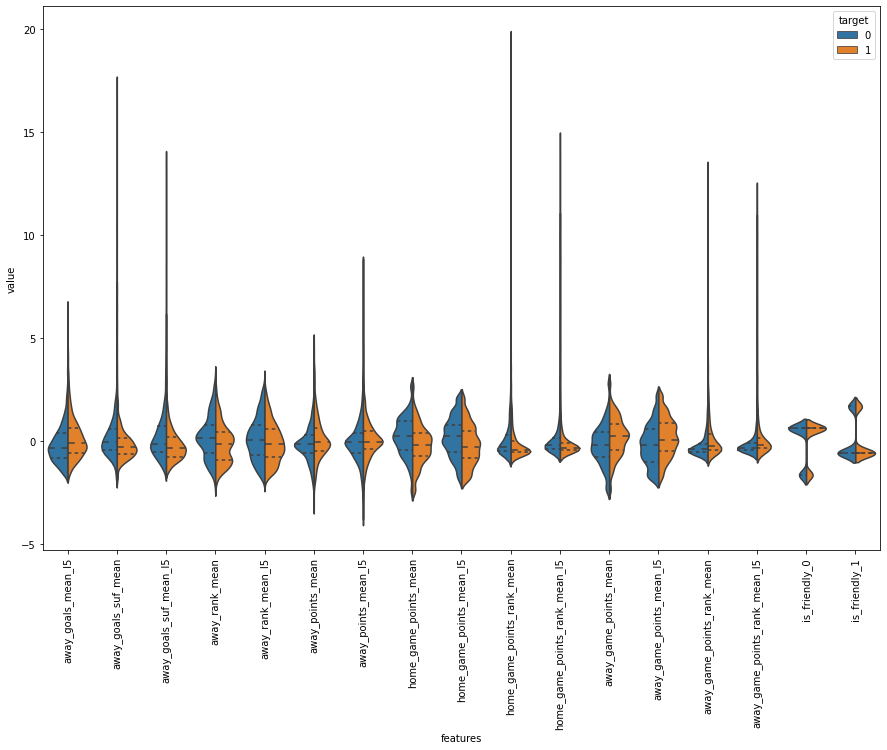

In [70]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin2,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

In [118]:
dif = df.copy()
dif.loc[:, "goals_dif"] = dif["home_goals_mean"] - dif["away_goals_mean"]
dif.loc[:, "goals_dif_l5"] = dif["home_goals_mean_l5"] - dif["away_goals_mean_l5"]
dif.loc[:, "goals_suf_dif"] = dif["home_goals_suf_mean"] - dif["away_goals_suf_mean"]
dif.loc[:, "goals_suf_dif_l5"] = dif["home_goals_suf_mean_l5"] - dif["away_goals_suf_mean_l5"]
dif.loc[:, "dif_rank_agst"] = dif["home_rank_mean"] - dif["away_rank_mean"]
dif.loc[:, "dif_rank_agst_l5"] = dif["home_rank_mean_l5"] - dif["away_rank_mean_l5"]
dif.loc[:, "dif_points_rank"] = dif["home_game_points_rank_mean"] - dif["away_game_points_rank_mean"]
dif.loc[:, "dif_points_rank_l5"] = dif["home_game_points_rank_mean_l5"] - dif["away_game_points_rank_mean_l5"]
dif.loc[:, "goals_per_ranking_dif"] = (dif["home_goals_mean"] / dif["home_rank_mean"]) - (dif["away_goals_mean"] / dif["away_rank_mean"])

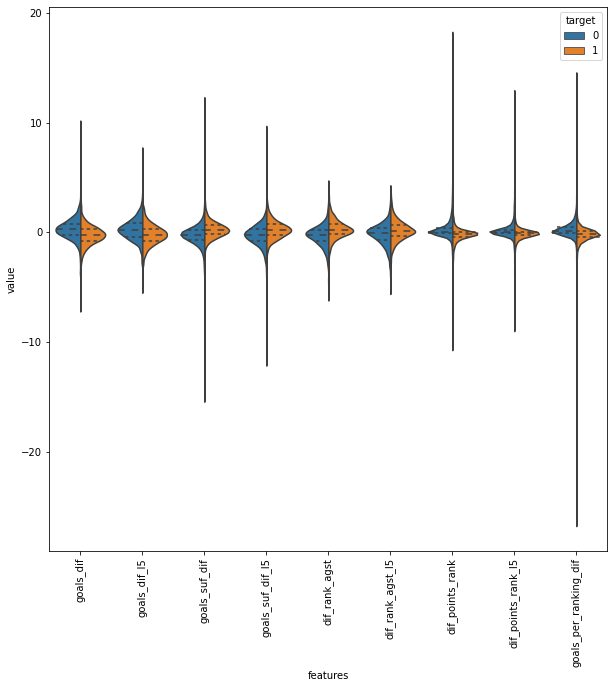

In [119]:
data_difs = dif.iloc[:, -9:]
scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["target"] = data2["target"]
violin = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=violin,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

###### features selected
- rank_diff
- goals_dif
- goals_dif_l5
- goals_suf_dif
- goals_suf_dif_l5
- dif_rank_agst
- dif_rank_agst_l5
- dif_points_rank
- dif_points_rank_l5
- goals_per_ranking_dif

In [120]:
model_df=dif[["home_team", "away_team", "target", "rank_dif", "goals_dif", "goals_dif_l5", 
              "goals_suf_dif", "goals_suf_dif_l5", "dif_rank_agst", "dif_rank_agst_l5", 
              "dif_points_rank",'goals_per_ranking_dif',"dif_points_rank_l5", "is_friendly_0", "is_friendly_1"]]

In [121]:
model_df

,home_team,away_team,target,rank_dif,goals_dif,goals_dif_l5,goals_suf_dif,goals_suf_dif_l5,dif_rank_agst,dif_rank_agst_l5,dif_points_rank,goals_per_ranking_dif,dif_points_rank_l5,is_friendly_0,is_friendly_1
4,Barbados,Cuba,1,-21.0,2.000000,2.0,1.000000,1.0,-92.000000,-92.0,0.018519,0.037037,0.018519,0,1
6,Barbados,Cuba,1,-21.0,1.000000,1.0,0.500000,0.5,-35.500000,-35.5,0.008897,0.008511,0.008897,0,1
33,Mongolia,Guam,1,-4.0,4.000000,4.0,-1.000000,-1.0,0.000000,0.0,0.016216,0.021622,0.016216,1,0
34,Nepal,Bhutan,0,-22.0,1.000000,1.0,0.000000,0.0,7.000000,7.0,0.000000,0.004975,0.000000,1,0
35,Bangladesh,Pakistan,0,-7.0,-1.000000,-1.0,-0.500000,-0.5,30.500000,30.5,-0.010437,-0.007200,-0.010437,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,Norway,Serbia,1,11.0,-0.038095,-0.8,-0.230159,0.0,9.014286,-3.4,-0.011343,-0.005282,0.016348,1,0
3533,Sweden,Slovenia,1,-45.0,0.030812,0.2,0.137255,0.2,-25.102241,10.2,0.022485,0.009459,-0.020314,1,0
3534,Kosovo,Cyprus,0,-2.0,0.667341,0.6,-0.463094,0.0,7.037917,1.6,0.008791,0.007625,-0.002827,1,0
3535,Greece,Northern Ireland,0,-9.0,0.067653,0.2,-0.369979,-1.2,16.024841,0.6,0.027775,-0.002915,0.018570,1,0


### Training model 

In [122]:
X = model_df.iloc[:, 3:]
y = model_df[["target"]]

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

In [125]:
gb = GradientBoostingClassifier(random_state=5)

params = {"learning_rate": [0.01, 0.1, 0.5],
            "min_samples_split": [5, 10],
            "min_samples_leaf": [3, 5],
            "max_depth":[3,5,10],
            "max_features":["sqrt"],
            "n_estimators":[100, 200]
         } 

gb_cv = GridSearchCV(gb, params, cv = 3, n_jobs = -1, verbose = False)

gb_cv.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=5),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200]},
             verbose=False)

In [126]:
gb=gb_cv.best_estimator_

In [127]:
gb

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features='sqrt',
                           min_samples_leaf=3, min_samples_split=5,
                           random_state=5)

In [128]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

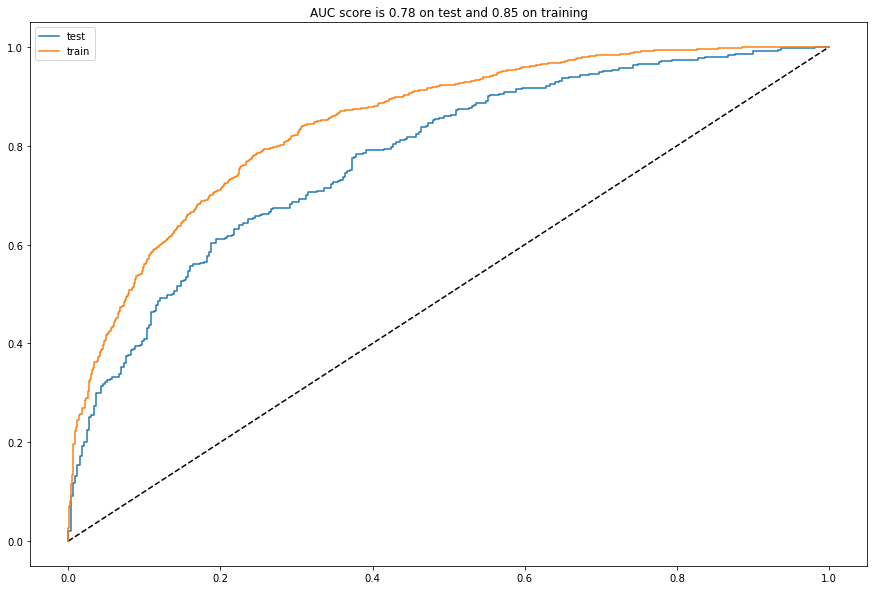

<AxesSubplot:>

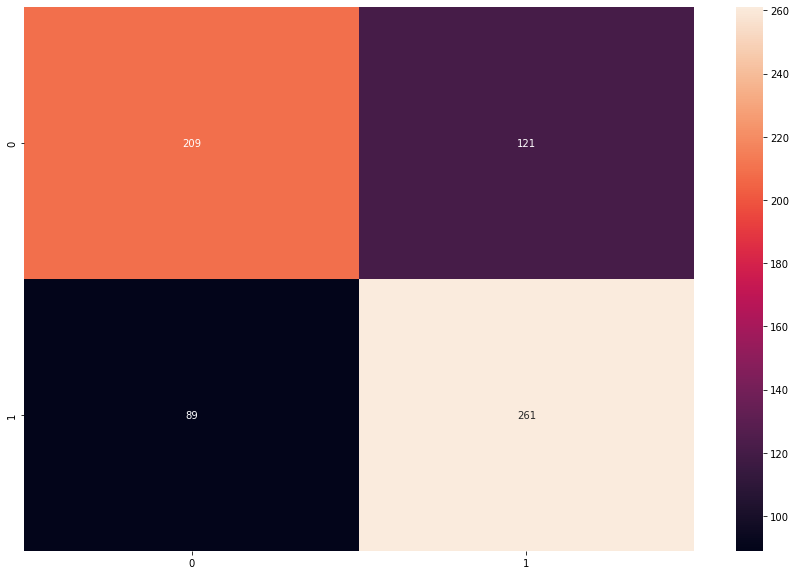

In [129]:
fpr, tpr, _ = roc_curve(y_test, gb.predict_proba(X_test.values)[:,1]) #test AUC
plt.figure(figsize=(15,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="test")

fpr_train, tpr_train, _ = roc_curve(y_train, gb.predict_proba(X_train.values)[:,1]) #train AUC
plt.plot(fpr_train, tpr_train, label="train")
auc_test = roc_auc_score(y_test, gb.predict_proba(X_test.values)[:,1])
auc_train = roc_auc_score(y_train, gb.predict_proba(X_train.values)[:,1])
plt.legend()
plt.title('AUC score is %.2f on test and %.2f on training'%(auc_test, auc_train))
plt.show()
    
plt.figure(figsize=(15, 10))
cm = confusion_matrix(y_test, gb.predict(X_test.values))
sns.heatmap(cm, annot=True, fmt="d")

#### Simulation 

In [130]:
qualified = ['Qatar', 'Iran', 'South Korea', 'Saudi Arabia', 'Japan', 'Australia', 
            'Germany', 'Denmark', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 
            'England', 'Netherlands', 'Switzerland', 'Portugal', 'Poland', 'Wales', 'Brazil', 
            'Argentina', 'Ecuador', 'Uruguay', 'Ghana', 'Senegal', 'Tunisia', 'Morocco', 
            'Cameroon', 'Canada', 'USA', 'Mexico', 'Costa Rica']

In [131]:
table={'A': [['Qatar', 0, []],
  ['Ecuador', 0, []],
  ['Senegal', 0, []],
  ['Netherlands', 0, []]],
 'B': [['England', 0, []],
  ['Iran', 0, []],
  ['United States', 0, []],
  ['Wales', 0, []]],
 'C': [['Argentina', 0, []],
  ['Saudi Arabia', 0, []],
  ['Mexico', 0, []],
  ['Poland', 0, []]],
 'D': [['France', 0, []],
  ['Australia', 0, []],
  ['Denmark', 0, []],
  ['Tunisia', 0, []]],
 'E': [['Spain', 0, []],
  ['Costa Rica', 0, []],
  ['Germany', 0, []],
  ['Japan', 0, []]],
 'F': [['Belgium', 0, []],
  ['Canada', 0, []],
  ['Morocco', 0, []],
  ['Croatia', 0, []]],
 'G': [['Brazil', 0, []],
  ['Serbia', 0, []],
  ['Switzerland', 0, []],
  ['Cameroon', 0, []]],
 'H': [['Portugal', 0, []],
  ['Ghana', 0, []],
  ['Uruguay', 0, []],
  ['South Korea', 0, []]]}

In [132]:
table

{'A': [['Qatar', 0, []],
  ['Ecuador', 0, []],
  ['Senegal', 0, []],
  ['Netherlands', 0, []]],
 'B': [['England', 0, []],
  ['Iran', 0, []],
  ['United States', 0, []],
  ['Wales', 0, []]],
 'C': [['Argentina', 0, []],
  ['Saudi Arabia', 0, []],
  ['Mexico', 0, []],
  ['Poland', 0, []]],
 'D': [['France', 0, []],
  ['Australia', 0, []],
  ['Denmark', 0, []],
  ['Tunisia', 0, []]],
 'E': [['Spain', 0, []],
  ['Costa Rica', 0, []],
  ['Germany', 0, []],
  ['Japan', 0, []]],
 'F': [['Belgium', 0, []],
  ['Canada', 0, []],
  ['Morocco', 0, []],
  ['Croatia', 0, []]],
 'G': [['Brazil', 0, []],
  ['Serbia', 0, []],
  ['Switzerland', 0, []],
  ['Cameroon', 0, []]],
 'H': [['Portugal', 0, []],
  ['Ghana', 0, []],
  ['Uruguay', 0, []],
  ['South Korea', 0, []]]}

In [133]:
matches=[('A', 'Qatar', 'Ecuador'),
 ('A', 'Senegal', 'Netherlands'),
 ('A', 'Qatar', 'Senegal'),
 ('A', 'Netherlands', 'Ecuador'),
 ('A', 'Ecuador', 'Senegal'),
 ('A', 'Netherlands', 'Qatar'),
 ('B', 'England', 'Iran'),
 ('B', 'United States', 'Wales'),
 ('B', 'Wales', 'Iran'),
 ('B', 'England', 'United States'),
 ('B','England','Wales'),
('B', 'Iran', 'United States') ,
('C' , 'Argentina' ,'Saudi Arabia'), 
('C', 'Mexico' ,'Poland'),  
('C', 'Poland', 'Saudi Arabia'),
('C' ,'Argentina' ,'Mexico' ),
('C' ,'Poland' ,'Saudi Arabia'),
('C' ,'Poland', 'Argentina'),   
('D', 'Denmark', 'Tunisia') ,
('D' ,'France' ,'Australia' ),
('D', 'Tunisia' ,'Australia' ),
('D', 'France' ,'Denmark'),
('D' ,'Tunisia', 'France' ),
('D', 'Australia' ,'Denmark'),  
('E' ,'Spain', 'Costa Rica' ),
('E', 'Germany', 'Japan' ),
('E' ,'Japan', 'Costa Rica'), 
('E', 'Spain', 'Germany'),
('E', 'Japan', 'Spain' ),
('E', 'Costa Rica' ,'Germany'),
('F', 'Morocco' ,'Croatia' ),
('F','Belgium' ,'Canada' ),
('F','Croatia', 'Canada' ),
('F', 'Belgium' ,'Morocco' ),
('F', 'Croatia' ,'Belgium' ),
('F', 'Canada', 'Morocco'),
('G', 'Switzerland', 'Cameroon'), 
('G', 'Brazil', 'Serbia') ,
('G', 'Brazil', 'Switzerland'), 
('G','Serbia' ,'Switzerland'), 
('G', 'Cameroon', 'Brazil') ,
('G', 'Cameroon' ,'Serbia')  ,       
('H', 'Portugal', 'Ghana' ),
('H', 'Uruguay', 'South Korea'), 
('H', 'South Korea' , 'Ghana' ),
('H', 'Portugal', 'Uruguay' ),
('H', 'South Korea', 'Portugal'), 
('H', 'Ghana' ,'Uruguay' )]      


In [108]:
team_stats_raw=team_stats.copy()

In [134]:
def find_stats(team_1):
#team_1 = "Qatar"
    past_games = team_stats_raw[(team_stats_raw["team"] == team_1)].sort_values("date")
    last5 = team_stats_raw[(team_stats_raw["team"] == team_1)].sort_values("date").tail(5)

    team_1_rank = past_games["rank"].values[-1]
    team_1_goals = past_games.score.mean()
    team_1_goals_l5 = last5.score.mean()
    team_1_goals_suf = past_games.suf_score.mean()
    team_1_goals_suf_l5 = last5.suf_score.mean()
    team_1_rank_suf = past_games.rank_suf.mean()
    team_1_rank_suf_l5 = last5.rank_suf.mean()
    team_1_gp_rank = past_games.points_by_rank.mean()
    team_1_gp_rank_l5 = last5.points_by_rank.mean()

    return [team_1_rank, team_1_goals, team_1_goals_l5, team_1_goals_suf, team_1_goals_suf_l5, team_1_rank_suf, team_1_rank_suf_l5, team_1_gp_rank, team_1_gp_rank_l5]

In [135]:
def find_features(team_1, team_2):
    rank_dif = team_1[0] - team_2[0]
    goals_dif = team_1[1] - team_2[1]
    goals_dif_l5 = team_1[2] - team_2[2]
    goals_suf_dif = team_1[3] - team_2[3]
    goals_suf_dif_l5 = team_1[4] - team_2[4]
    goals_per_ranking_dif = (team_1[1]/team_1[5]) - (team_2[1]/team_2[5])
    dif_rank_agst = team_1[5] - team_2[5]
    dif_rank_agst_l5 = team_1[6] - team_2[6]
    dif_gp_rank = team_1[7] - team_2[7]
    dif_gp_rank_l5 = team_1[8] - team_2[8]
    
    return [rank_dif, goals_dif, goals_dif_l5, goals_suf_dif, goals_suf_dif_l5, goals_per_ranking_dif, dif_rank_agst, dif_rank_agst_l5, dif_gp_rank, dif_gp_rank_l5, 1, 0]

In [136]:
import operator
advanced_group = []
last_group = ""

for k in table.keys():
    for t in table[k]:
        t[1] = 0
        t[2] = []
        
for teams in matches:
    draw = False
    team_1 = find_stats(teams[1])
    team_2 = find_stats(teams[2])

    features_g1 = find_features(team_1, team_2)
    features_g2 = find_features(team_2, team_1)

    probs_g1 = gb.predict_proba([features_g1])
    probs_g2 = gb.predict_proba([features_g2])
    
    team_1_prob_g1 = probs_g1[0][0]
    team_1_prob_g2 = probs_g2[0][1]
    team_2_prob_g1 = probs_g1[0][1]
    team_2_prob_g2 = probs_g2[0][0]

    team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
    team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
    
    if ((team_1_prob_g1 > team_2_prob_g1) & (team_2_prob_g2 > team_1_prob_g2)) | ((team_1_prob_g1 < team_2_prob_g1) & (team_2_prob_g2 < team_1_prob_g2)):
        draw=True
        for i in table[teams[0]]:
            if i[0] == teams[1] or i[0] == teams[2]:
                i[1] += 1
                
    elif team_1_prob > team_2_prob:
        winner = teams[1]
        winner_proba = team_1_prob
        for i in table[teams[0]]:
            if i[0] == teams[1]:
                i[1] += 3
                
    elif team_2_prob > team_1_prob:  
        winner = teams[2]
        winner_proba = team_2_prob
        for i in table[teams[0]]:
            if i[0] == teams[2]:
                i[1] += 3
    
    for i in table[teams[0]]: #adding criterio de desempate (probs por jogo)
            if i[0] == teams[1]:
                i[2].append(team_1_prob)
            if i[0] == teams[2]:
                i[2].append(team_2_prob)

    if last_group != teams[0]:
        if last_group != "":
            print("\n")
            print("Group %s advanced: "%(last_group))
            
            for i in table[last_group]: #adding crieterio de desempate
                i[2] = np.mean(i[2])
            
            final_points = table[last_group]
            final_table = sorted(final_points, key=operator.itemgetter(1, 2), reverse = True)
            advanced_group.append([final_table[0][0], final_table[1][0]])
            for i in final_table:
                print("%s -------- %d"%(i[0], i[1]))
        print("\n")
        print("-"*10+" Starting Analysis for Group %s "%(teams[0])+"-"*10)
        
        
    if draw == False:
        print("Group %s - %s vs. %s: Winner %s with %.2f probability"%(teams[0], teams[1], teams[2], winner, winner_proba))
    else:
        print("Group %s - %s vs. %s: Draw"%(teams[0], teams[1], teams[2]))
    last_group =  teams[0]

print("\n")
print("Group %s advanced: "%(last_group))

for i in table[last_group]: #adding crieterio de desempate
    i[2] = np.mean(i[2])
            
final_points = table[last_group]
final_table = sorted(final_points, key=operator.itemgetter(1, 2), reverse = True)
advanced_group.append([final_table[0][0], final_table[1][0]])
for i in final_table:
    print("%s -------- %d"%(i[0], i[1]))



---------- Starting Analysis for Group A ----------
Group A - Qatar vs. Ecuador: Draw
Group A - Senegal vs. Netherlands: Draw
Group A - Qatar vs. Senegal: Winner Senegal with 0.59 probability
Group A - Netherlands vs. Ecuador: Winner Netherlands with 0.60 probability
Group A - Ecuador vs. Senegal: Draw
Group A - Netherlands vs. Qatar: Winner Netherlands with 0.62 probability


Group A advanced: 
Netherlands -------- 7
Senegal -------- 5
Ecuador -------- 2
Qatar -------- 1


---------- Starting Analysis for Group B ----------
Group B - England vs. Iran: Draw
Group B - United States vs. Wales: Winner United States with 0.57 probability
Group B - Wales vs. Iran: Winner Iran with 0.55 probability
Group B - England vs. United States: Draw
Group B - England vs. Wales: Winner England with 0.62 probability
Group B - Iran vs. United States: Draw


Group B advanced: 
England -------- 5
United States -------- 5
Iran -------- 5
Wales -------- 0


---------- Starting Analysis for Group C --------

In [137]:
advanced = advanced_group

In [138]:
playoffs = {"Round of 16": [], "Quarter-Final": [], "Semi-Final": [], "Final": []}

In [139]:
for p in playoffs.keys():
    playoffs[p] = []

actual_round = ""
next_rounds = []

for p in playoffs.keys():
    if p == "Round of 16":
        control = []
        for a in range(0, len(advanced*2), 1):
            if a < len(advanced):
                if a % 2 == 0:
                    control.append((advanced*2)[a][0])
                else:
                    control.append((advanced*2)[a][1])
            else:
                if a % 2 == 0:
                    control.append((advanced*2)[a][1])
                else:
                    control.append((advanced*2)[a][0])

        playoffs[p] = [[control[c], control[c+1]] for c in range(0, len(control)-1, 1) if c%2 == 0]
        
        for i in range(0, len(playoffs[p]), 1):
            game = playoffs[p][i]
            
            home = game[0]
            away = game[1]
            team_1 = find_stats(home)
            team_2 = find_stats(away)

            features_g1 = find_features(team_1, team_2)
            features_g2 = find_features(team_2, team_1)
            
            probs_g1 = gb.predict_proba([features_g1])
            probs_g2 = gb.predict_proba([features_g2])
            
            team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
            team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
            
            if actual_round != p:
                print("-"*10)
                print("Starting simulation of %s"%(p))
                print("-"*10)
                print("\n")
            
            if team_1_prob < team_2_prob:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, away, team_2_prob))
                next_rounds.append(away)
            else:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, home, team_1_prob))
                next_rounds.append(home)
            
            game.append([team_1_prob, team_2_prob])
            playoffs[p][i] = game
            actual_round = p
        
    else:
        playoffs[p] = [[next_rounds[c], next_rounds[c+1]] for c in range(0, len(next_rounds)-1, 1) if c%2 == 0]
        next_rounds = []
        for i in range(0, len(playoffs[p])):
            game = playoffs[p][i]
            home = game[0]
            away = game[1]
            team_1 = find_stats(home)
            team_2 = find_stats(away)
            
            features_g1 = find_features(team_1, team_2)
            features_g2 = find_features(team_2, team_1)
            
            probs_g1 = gb.predict_proba([features_g1])
            probs_g2 = gb.predict_proba([features_g2])
            
            team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
            team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
            
            if actual_round != p:
                print("-"*10)
                print("Starting simulation of %s"%(p))
                print("-"*10)
                print("\n")
            
            if team_1_prob < team_2_prob:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, away, team_2_prob))
                next_rounds.append(away)
            else:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, home, team_1_prob))
                next_rounds.append(home)
            game.append([team_1_prob, team_2_prob])
            playoffs[p][i] = game
            actual_round = p
            

----------
Starting simulation of Round of 16
----------


Netherlands vs. United States: Netherlands advances with prob 0.51
Argentina vs. Denmark: Argentina advances with prob 0.53
Spain vs. Morocco: Spain advances with prob 0.55
Brazil vs. South Korea: Brazil advances with prob 0.62
Senegal vs. England: England advances with prob 0.55
Poland vs. France: France advances with prob 0.60
Japan vs. Belgium: Belgium advances with prob 0.57
Switzerland vs. Portugal: Portugal advances with prob 0.54
----------
Starting simulation of Quarter-Final
----------


Netherlands vs. Argentina: Argentina advances with prob 0.51
Spain vs. Brazil: Brazil advances with prob 0.51
England vs. France: France advances with prob 0.52
Belgium vs. Portugal: Portugal advances with prob 0.53
----------
Starting simulation of Semi-Final
----------


Argentina vs. Brazil: Argentina advances with prob 0.53
France vs. Portugal: Portugal advances with prob 0.50
----------
Starting simulation of Final
----------


Ar